In [21]:
from qiskit_qudits import QuditCircuit
qdc = QuditCircuit([9], 2, 1, modular_qudits=True)
qdc.x(qdc.qudits[0][0])
qdc.h(qdc.qudits[0][1])
qdc.x(qdc.qudits[0][2])
qdc.h(1)
qdc.measure(qargs=1, cargs=0)
qdc.measure_all()

qdc.draw(output="text")

┌───┐┌──────────┐   ┌──────────┐      
  qd_0: ┤ X ├┤0         ├───┤0         ├──────
        ├───┤│          │   │          │      
  qd_1: ┤ H ├┤1         ├───┤1         ├──────
        ├───┤│  BARRIER │   │          │      
  qd_2: ┤ X ├┤2         ├───┤2         ├──────
        └───┘│          │   │          │      
  qd_3: ─────┤3         ├───┤3         ├──────
             └──────────┘ ░ │          │┌─┐   
   q_0: ──────────────────░─┤          ├┤M├───
        ┌───┐    ┌─┐      ░ │          │└╥┘┌─┐
   q_1: ┤ H ├────┤M├──────░─┤  MEASURE ├─╫─┤M├
        └───┘    └╥┘      ░ │          │ ║ └╥┘
   c_0: ══════════╩═════════╡          ╞═╬══╬═
                            │          │ ║  ║ 
meas_0: ════════════════════╡0         ╞═╬══╬═
                            │          │ ║  ║ 
meas_1: ════════════════════╡1         ╞═╬══╬═
                            │          │ ║  ║ 
meas_2: ════════════════════╡2         ╞═╬══╬═
                            │          │ ║  ║ 
meas_3: ════════════════════╡3         ╞═╬══╬═
                            └──────────┘ ║  ║ 
meas_4: ═════════════════════════════════╩══╬═
                                            ║ 
meas_5: ════════════════════════════════════╩═

{'100111 1': 28, '000101 0': 20, '000111 0': 26, '100101 1': 25} {'10###7 1': 28, '00###5 0': 20, '00###7 0': 26, '10###5 1': 25}


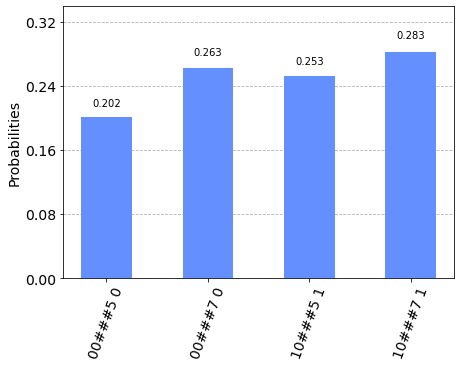

In [22]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

from qiskit_qudits.visualization import counts_to_quditcounts

simulator = Aer.get_backend('qasm_simulator') #simulation part
job = execute(qdc, simulator, shots=99)
counts = job.result().get_counts()

qd_counts = counts_to_quditcounts(qdc, counts)
print(counts, qd_counts)
plot_histogram(qd_counts)
